In [6]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [8]:
stocks = input("Enter the code of Stock :- ")
data = yf.download(stocks,"2008-01-01","2022-06-27",auto_adjust=True)
# data.head()
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-06-17,130.070007,133.080002,129.809998,131.559998,134118500
2022-06-21,133.419998,137.059998,133.320007,135.869995,81000500
2022-06-22,134.789993,137.759995,133.910004,135.350006,73409200
2022-06-23,136.820007,138.589996,135.630005,138.270004,72433800
2022-06-24,139.899994,141.910004,139.770004,141.660004,89047400


In [9]:
data.shape

(3647, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 2007-12-31 to 2022-06-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3647 non-null   float64
 1   High    3647 non-null   float64
 2   Low     3647 non-null   float64
 3   Close   3647 non-null   float64
 4   Volume  3647 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 171.0 KB


In [11]:
data.describe()

,Open,High,Low,Close,Volume
count,3647.000000,3647.000000,3647.000000,3647.000000,3.647000e+03
mean,39.728752,40.165990,39.296568,39.747050,3.448528e+08
std,43.396615,43.931506,42.875022,43.422588,3.356905e+08
min,2.424281,2.503981,2.387943,2.387943,4.100000e+07
25%,11.402275,11.570072,11.306543,11.444109,1.135022e+08
50%,23.406871,23.660843,23.290631,23.560329,2.147980e+08
75%,45.544269,45.988900,45.155446,45.587580,4.540214e+08
max,182.130025,182.439174,178.629624,181.511703,3.372970e+09


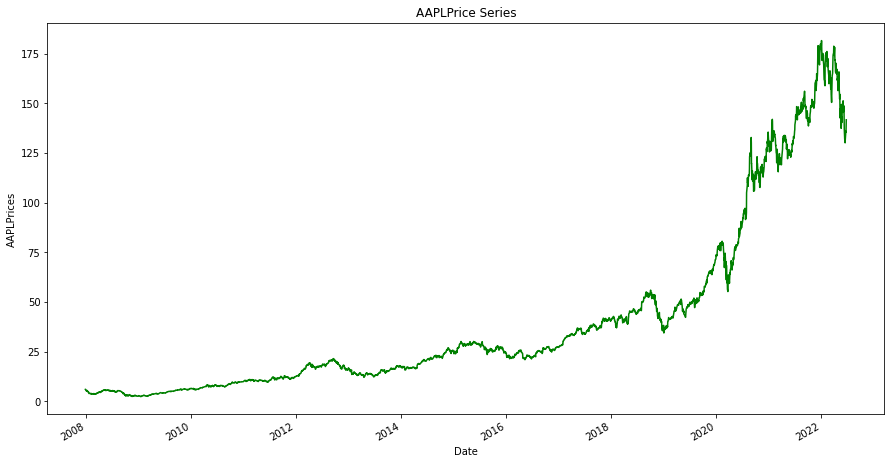

In [12]:
data.Close.plot(figsize=(15,8),color='g')
plt.ylabel("{}Prices".format(stocks))
plt.title("{}Price Series".format(stocks))
plt.show()

c:\VScode\project_mark_alpha\stock_price_prediction\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

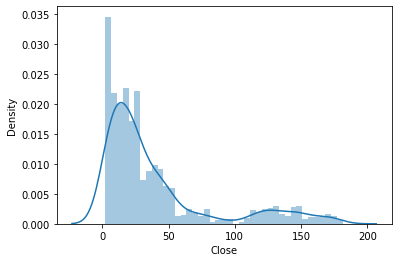

In [13]:
sns.distplot(data["Close"])

c:\VScode\project_mark_alpha\stock_price_prediction\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

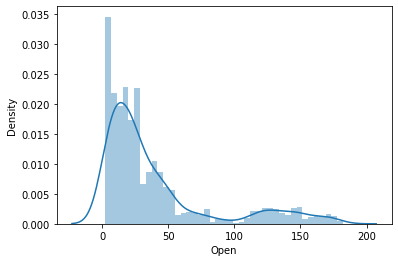

In [14]:
sns.distplot(data["Open"])

c:\VScode\project_mark_alpha\stock_price_prediction\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

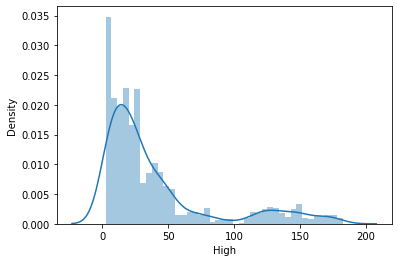

In [15]:
sns.distplot(data["High"])

In [17]:
X = data.drop("Close",axis=1)
y = data["Close"] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2917, 4)
(730, 4)
(2917,)
(730,)


In [18]:
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()
 lr.fit(X_train,y_train)
 pred1 = lr.predict(X_test)

In [19]:
 pred1.shape

(730,)

In [20]:
from sklearn.metrics import mean_squared_error ,r2_score

def calculate_metrics(y_test,y_pred):
  mse = mean_squared_error(y_test,y_pred)
  rmse= np.sqrt(mse)
  rse = r2_score(y_test,y_pred)
  print("MSE :- ",mse)
  print("RMSE :- ",rmse)
  print("R2_score :- ",rse)

calculate_metrics(y_test,pred1)

MSE :-  0.19839889142216283
RMSE :-  0.44541990460930553
R2_score :-  0.9999017466316927


In [21]:
 from sklearn.linear_model import Lasso, Ridge 

 la = Lasso().fit(X_train, y_train )
 ri = Ridge().fit(X_train, y_train ) 

 la_p = la.predict(X_test) 
 ri_p = ri.predict(X_test)

c:\VScode\project_mark_alpha\stock_price_prediction\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.809e+02, tolerance: 5.400e+02
  model = cd_fast.enet_coordinate_descent(
c:\VScode\project_mark_alpha\stock_price_prediction\env\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.36263e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [22]:
 calculate_metrics(y_test, la_p)

MSE :-  0.8829123226356437
RMSE :-  0.9396341429703604
R2_score :-  0.9995627540607857


In [23]:
 calculate_metrics(y_test, ri_p)

MSE :-  0.19849862734909596
RMSE :-  0.4455318477382913
R2_score :-  0.9999016972393262


In [24]:
 from sklearn.svm import SVR 
 from sklearn.model_selection import GridSearchCV 

 svr = SVR() 

 param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

 grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
 grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.129 total time=   4.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.111 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.147 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.148 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.137 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.129 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.111 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.147 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.148 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.137 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.129 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 


In [27]:
svr_pred

array([24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02950887,
       24.02950887, 24.02950887, 24.02950887, 24.02950887, 24.02

In [28]:
from sklearn.metrics import mean_squared_error ,r2_score

def calculate_metrics(y_test,svr_pred):
  mse = mean_squared_error(y_test,svr_pred)
  rmse= np.sqrt(mse)
  rse = r2_score(y_test,svr_pred)

  print("MSE :- ",mse)
  print("RMSE :- ",rmse)
  print("R2_score :- ",rse)

calculate_metrics(y_test,svr_pred)

MSE :-  2279.8513066590094
RMSE :-  47.74778850019139
R2_score :-  -0.1290540411456773


In [29]:
import joblib  
joblib.dump(ri, 'model.pkl') 
ridge_from_joblib = model = joblib.load("model.pkl")